# Data Visualisation w/ Seaborn

- **Trends** - A trend is defined as a pattern of change.
    - `sns.lineplot` - **Line charts** are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.


- **Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
    - `sns.barplot` - **Bar charts** are useful for comparing quantities corresponding to different groups.
    - `sns.heatmap` - **Heatmaps** can be used to find color-coded patterns in tables of numbers.
    - `sns.scatterplot` - **Scatter plots** show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
    - `sns.regplot` - Including a **regression line** in the scatter plot makes it easier to see any linear relationship between two variables.
    - `sns.lmplot` - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
    - `sns.swarmplot` - **Categorical scatter** plots show the relationship between a continuous variable and a categorical variable.


- **Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
    - `sns.distplot` - **Histograms** show the distribution of a single numerical variable.
    - `sns.kdeplot` - **KDE plots (or 2D KDE plots)** show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
    - `sns.jointplot` - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

### FIFA and lineplot

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
fifa = pd.read_csv('sns_data/fifa.csv', index_col="Date", parse_dates=True)
fifa.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


<AxesSubplot:xlabel='Date'>

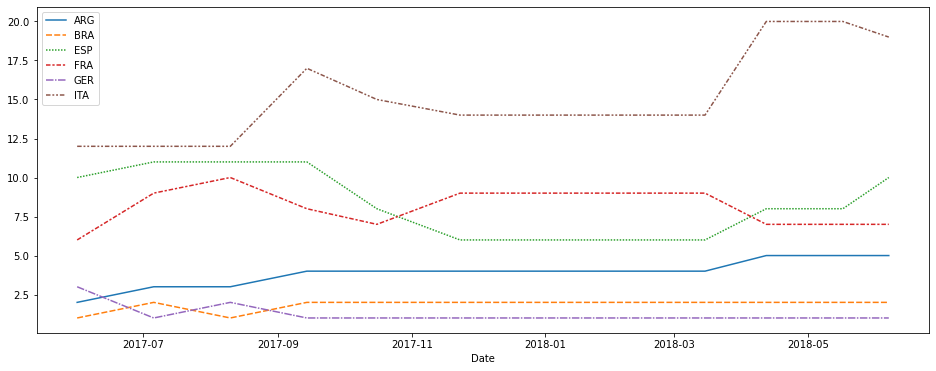

In [3]:
plt.figure(figsize=(16,6))
sns.lineplot(data=fifa['2017-6-1':'2020-6-10'])

### Flights: barplot and heatmaps

In [18]:
flights = pd.read_csv('sns_data/flights.csv', index_col="Month")
flights.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


/Users/vadim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


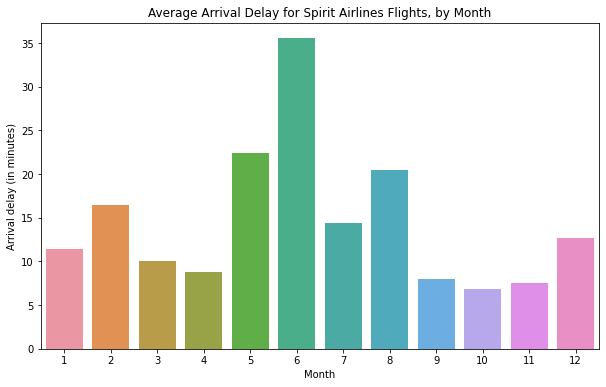

In [19]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

sns.barplot(flights.index, flights.NK)
plt.ylabel("Arrival delay (in minutes)")
plt.show()

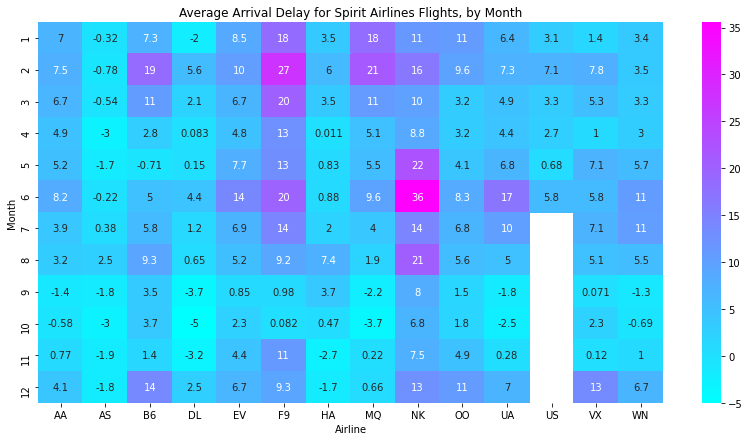

In [22]:
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

sns.heatmap(flights, annot=True, cmap='cool')
plt.xlabel("Airline")
plt.show()

'spring'

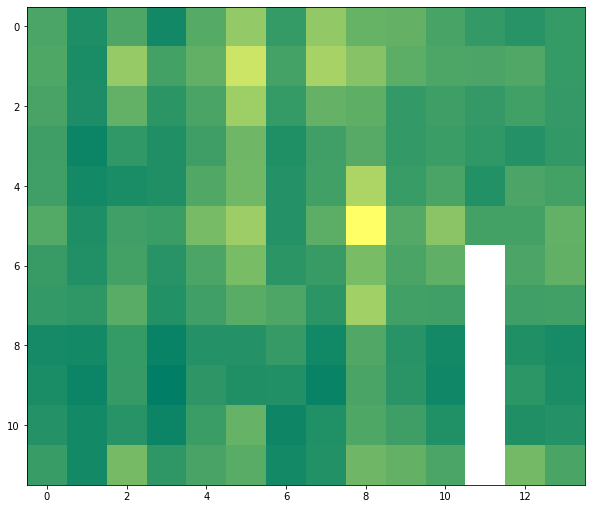

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(flights, cmap='summer')

'spring'
'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot'

### Scatter plot

/Users/vadim/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

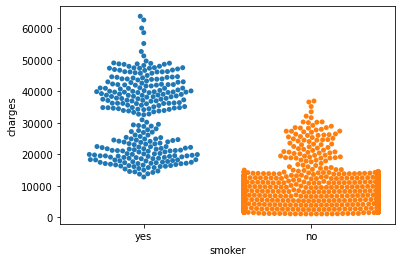

In [5]:
insurance_data = pd.read_csv('sns_data/insurance_data.csv')

sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

In [7]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

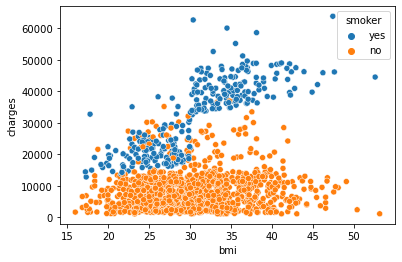

In [14]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])


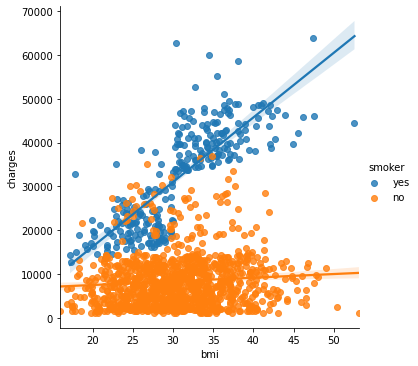

In [5]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

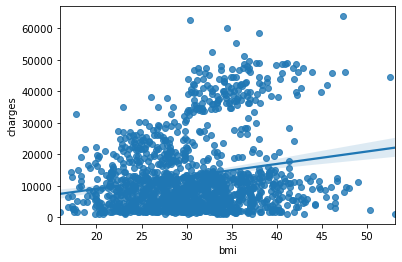

In [6]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

### Distributions

In [6]:
iris_data = pd.read_csv("sns_data/iris.csv", index_col="Id")
np.unique(iris_data.Species.values)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='Petal Length (cm)'>

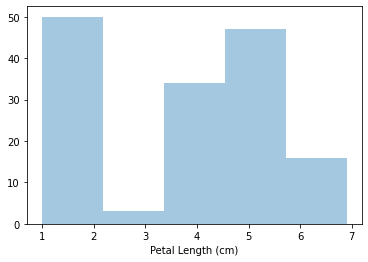

In [23]:
# Histogram 
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

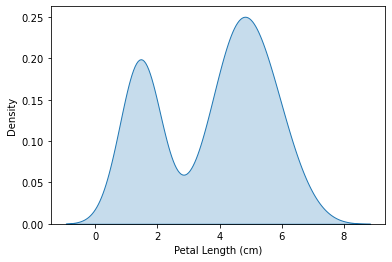

In [24]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

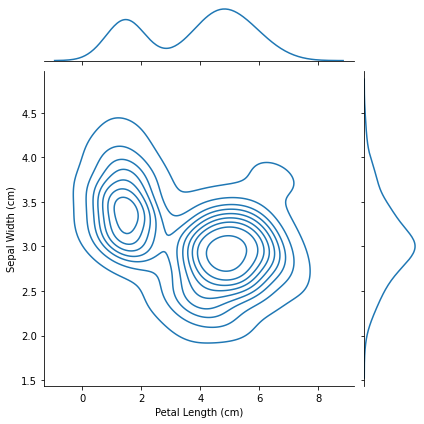

In [14]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

In [34]:
iris_set_data = iris_data[iris_data['Species']=='Iris-setosa']
iris_ver_data = iris_data[iris_data['Species']=='Iris-versicolor']
iris_vir_data = iris_data[iris_data['Species']=='Iris-virginica']

<AxesSubplot:xlabel='Sepal Width (cm)', ylabel='Sepal Length (cm)'>

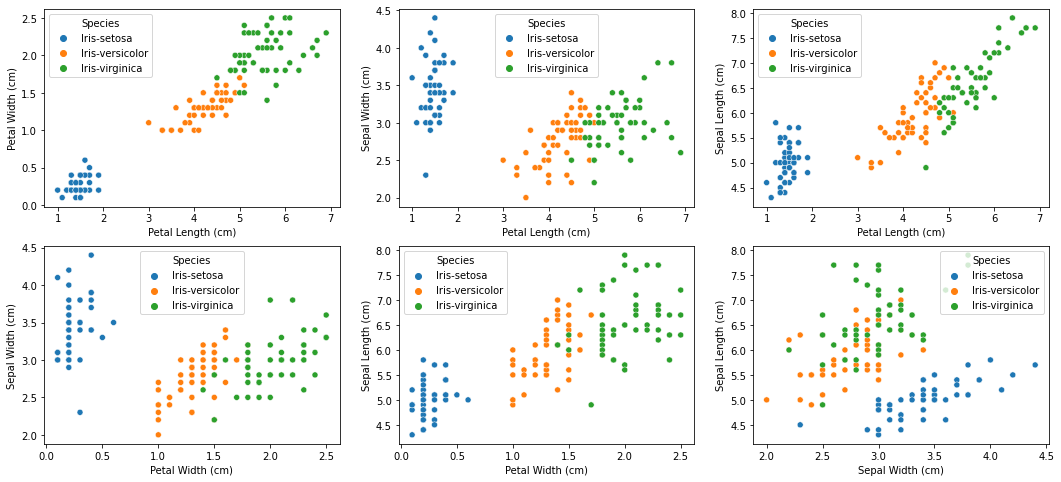

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
sns.scatterplot(ax=axs[0, 0], x=iris_data['Petal Length (cm)'], y=iris_data['Petal Width (cm)'], hue=iris_data['Species'])
sns.scatterplot(ax=axs[0, 1], x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], hue=iris_data['Species'])
sns.scatterplot(ax=axs[0, 2], x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Length (cm)'], hue=iris_data['Species'])
sns.scatterplot(ax=axs[1, 0], x=iris_data['Petal Width (cm)'], y=iris_data['Sepal Width (cm)'], hue=iris_data['Species'])
sns.scatterplot(ax=axs[1, 1], x=iris_data['Petal Width (cm)'], y=iris_data['Sepal Length (cm)'], hue=iris_data['Species'])
sns.scatterplot(ax=axs[1, 2], x=iris_data['Sepal Width (cm)'], y=iris_data['Sepal Length (cm)'], hue=iris_data['Species'])

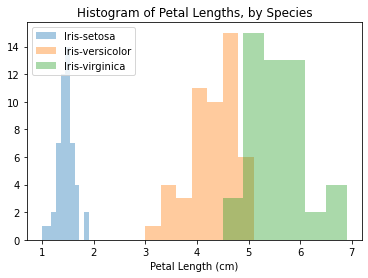

In [65]:
sns.distplot(a=iris_set_data['Petal Length (cm)'], label='Iris-setosa', kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label='Iris-versicolor', kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label='Iris-virginica', kde=False)

plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

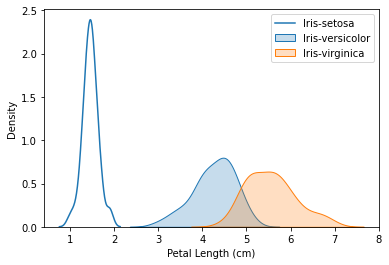

In [70]:
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label='Iris-setosa', shade=False)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label='Iris-versicolor', shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label='Iris-virginica', shade=True)

# Force legend to appear
plt.legend()

## STYLING ✨

<AxesSubplot:xlabel='Date'>

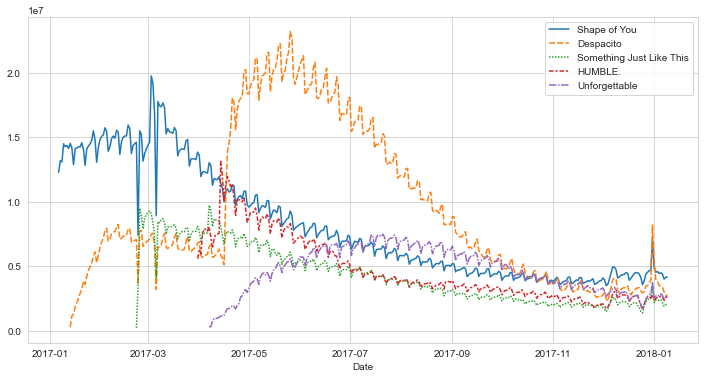

In [7]:
spotify_data = pd.read_csv("sns_data/spotify.csv", index_col="Date", parse_dates=True)

sns.set_style("whitegrid") 
# "darkgrid" "whitegrid" "dark" "white" "ticks"

plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)